In [32]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = 8, 7
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.family"] = "normal"
plt.rcParams["font.size"] = 25
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18
plt.rcParams['axes.labelsize']=18
plt.rcParams['legend.fontsize']: 16
    
sns.set()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

**Part I: Data Analysis**

In [33]:
bank = pd.read_csv('Churn_Modelling.csv')
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [34]:
### Dropping RowNumber & Surname Column (Don't help in predicting churn) and Inspecting Potential Duplicates in 'CustomerId' Before Dropping ###
bank = bank.drop(['RowNumber', 'Surname'], axis=1)
print(len(bank['CustomerId'].value_counts()))

10000


In [35]:
bank = bank.drop('CustomerId', axis=1)
print(bank.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype='object')


In [36]:
### Providing better column names ###
bank.columns = ['Credit_Score', 'Country', 'Gender', 'Age', 'Tenure', 'Balance', 'Num_Accounts', 'Credit_Card', 'Active_Member', 'Income', 'Churn']

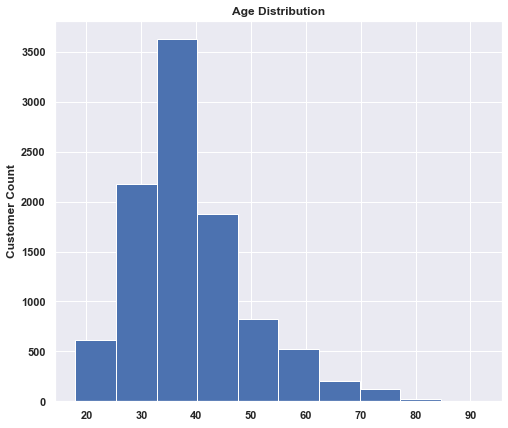

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64


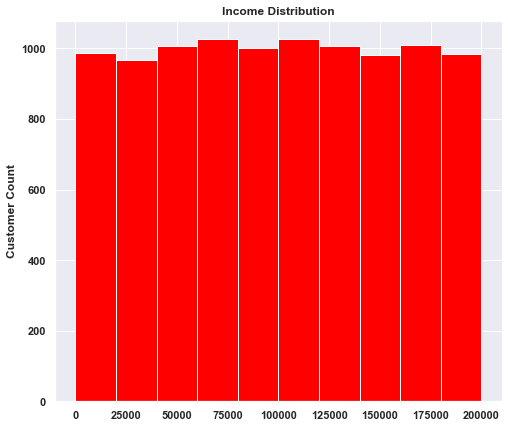

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: Income, dtype: float64


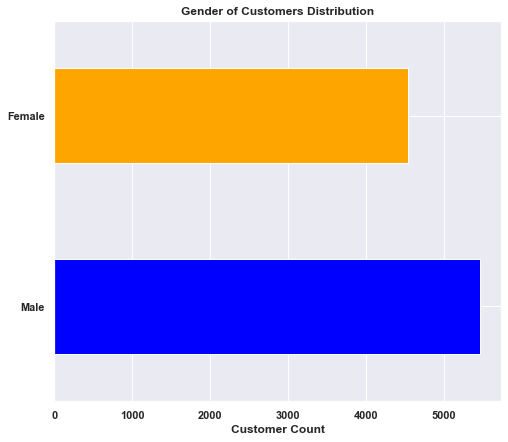

Male      5457
Female    4543
Name: Gender, dtype: int64


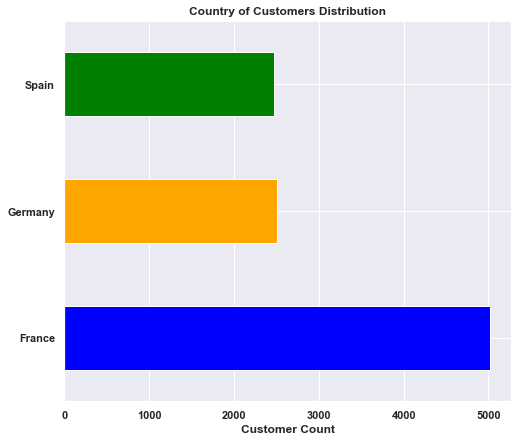

France     5014
Germany    2509
Spain      2477
Name: Country, dtype: int64


In [37]:
my_colors = ['blue', 'orange', 'green', 'red']

### Age of Customers ###
plt.hist(bank['Age'])
plt.ylabel('Customer Count')
plt.title('Age Distribution', fontweight='bold')
plt.show()
print(bank['Age'].describe())

### Income of Customers ###
plt.hist(bank['Income'], color='red')
plt.ylabel('Customer Count')
plt.title('Income Distribution', fontweight='bold')
plt.show()
print(bank['Income'].describe())

### Gender of Customers ###
bank['Gender'].value_counts().plot(kind='barh', color=my_colors)
plt.title('Gender of Customers Distribution', fontweight='bold')
plt.xlabel('Customer Count')
plt.show()
print(bank['Gender'].value_counts())

### Country ###
bank['Country'].value_counts().plot(kind='barh', color=my_colors)
plt.title('Country of Customers Distribution', fontweight='bold')
plt.xlabel('Customer Count')
plt.show()
print(bank['Country'].value_counts())

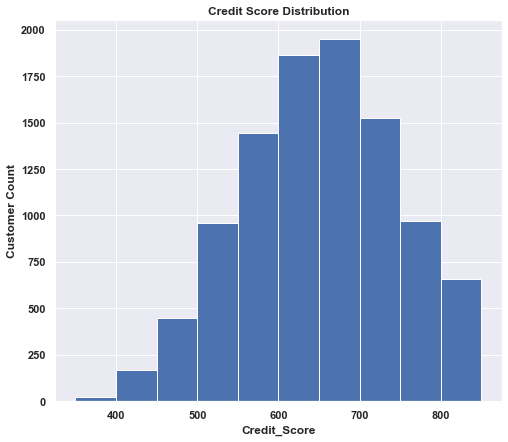

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: Credit_Score, dtype: float64


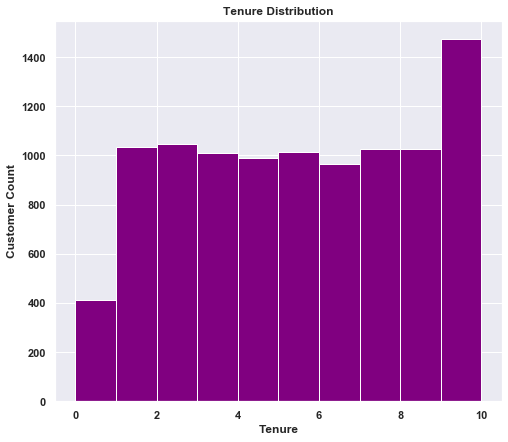

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64


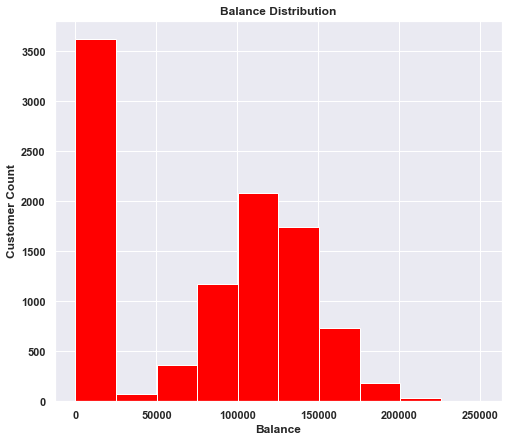

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64


In [50]:
### Credit of Customers ###
plt.hist(bank['Credit_Score'])
plt.ylabel('Customer Count')
plt.xlabel('Credit_Score')
plt.title('Credit Score Distribution', fontweight='bold')
plt.show()
print(bank['Credit_Score'].describe())

### Tenure of Customers ###
plt.hist(bank['Tenure'], color='purple')
plt.ylabel('Customer Count')
plt.xlabel('Tenure')
plt.title('Tenure Distribution', fontweight='bold')
plt.show()
print(bank['Tenure'].describe())

### Balance of Customers ###
plt.hist(bank['Balance'], color='red')
plt.ylabel('Customer Count')
plt.xlabel('Balance')
plt.title('Balance Distribution', fontweight='bold')
plt.show()
print(bank['Balance'].describe())

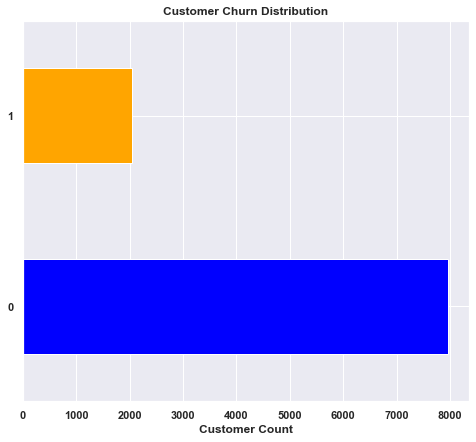

0    7963
1    2037
Name: Churn, dtype: int64


In [39]:
### Viewing the number of customers who churned ('Churn' = 1) or not ('Churn' = 0) ###
bank['Churn'].value_counts().plot(kind='barh', color=my_colors)
plt.title('Customer Churn Distribution', fontweight='bold')
plt.xlabel('Customer Count')
plt.show()
print(bank['Churn'].value_counts())

In [40]:
### Preparing Dataset for Tableau ###

convert = {0: 'No', 1:'Yes'}
tableau_bank = pd.read_csv('Churn_Modelling.csv')
tableau_bank = tableau_bank.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1)
tableau_bank.columns = ['Credit_Score', 'Country', 'Gender', 'Age', 'Tenure', 'Balance', 'Num_Accounts', 'Credit_Card', 'Active_Member', 'Income', 'Churn']
tableau_bank['Churn'] = tableau_bank['Churn'].map(convert)
tableau_bank['Credit_Card'] = tableau_bank['Credit_Card'].map(convert)
tableau_bank['Active_Member'] = tableau_bank['Active_Member'].map(convert)
tableau_bank.to_csv('Bank_Churn.csv', index=False)

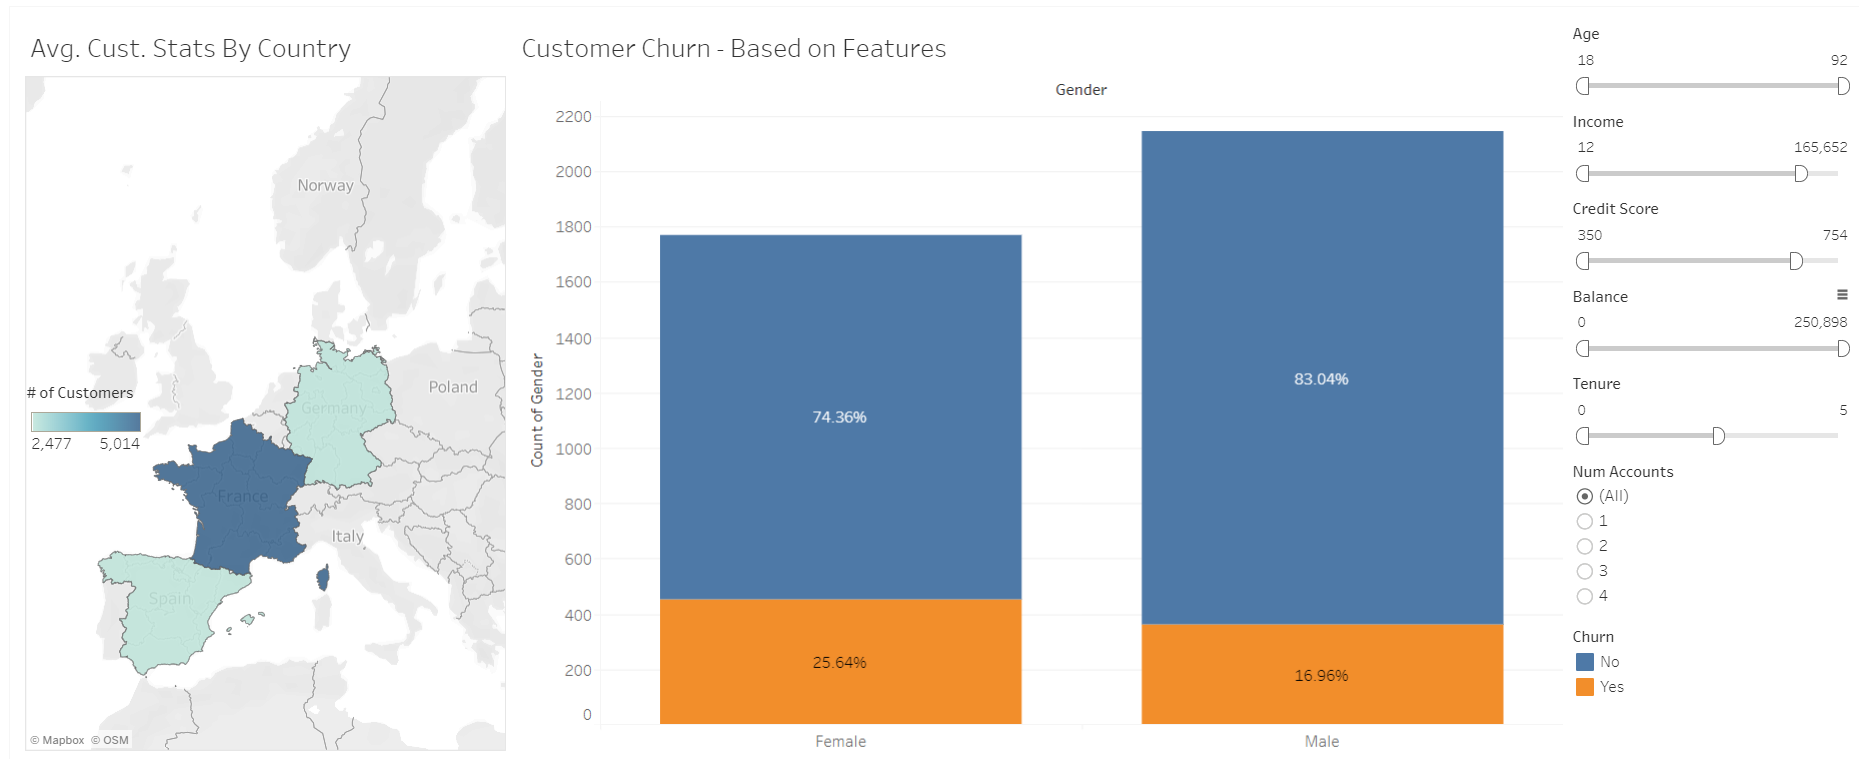

LINK TO TABLEAU DASHBOARD: https://public.tableau.com/profile/rachid.rezzik#!/vizhome/Bank_Customer_Churn/Dashboard1?publish=yes 

**Dashboard Takeaways (Will compute here using Pandas)**

In [41]:
### Churn Rate by Country ### 

churn = bank.groupby('Country').agg({'Churn': [np.mean, 'count']})
print(churn)
print('\nChurn in Germany occured nearly twice as often as the second highest churn rate (Spain)')

            Churn      
             mean count
Country                
France   0.161548  5014
Germany  0.324432  2509
Spain    0.166734  2477

Churn in Germany occured nearly twice as often as the second highest churn rate (Spain)


In [42]:
### Churn Rate by Gender ###

churn = bank.groupby('Gender').agg({'Churn': [np.mean, 'count']})
print(churn)
print('\nFemales tend to churn at a higher rate than Males')

           Churn      
            mean count
Gender                
Female  0.250715  4543
Male    0.164559  5457

Females tend to churn at a higher rate than Males


In [43]:
### Churn Rate by Number of Accounts ###

churn = bank.groupby('Num_Accounts').agg({'Churn': [np.mean, 'count']})
print(churn)
print('\nAmong these customers, two accounts seemed to be the sweetspot for lower churn rate at roughly 8%. Churn rate greatly increased with three (83% churn) and four accounts (100% churn)')

                 Churn      
                  mean count
Num_Accounts                
1             0.277144  5084
2             0.075817  4590
3             0.827068   266
4             1.000000    60

Among these customers, two accounts seemed to be the sweetspot for lower churn rate at roughly 8%. Churn rate greatly increased with three (83% churn) and four accounts (100% churn)


In [44]:
### Churn Rate by if they are an Active Member (1) or not (0) ###

churn = bank.groupby('Active_Member').agg({'Churn': [np.mean, 'count']})
print(churn)
print('\nUnsurprisingly, those who were deemed by the company to be active members contained a lower churn rate ')

                  Churn      
                   mean count
Active_Member                
0              0.268509  4849
1              0.142691  5151

Unsurprisingly, those who were deemed by the company to be active members contained a lower churn rate 


               Churn      
                mean count
Age_Group                 
Late-Teens  0.056180    89
Twenties    0.076104  1879
Thirties    0.120872  4451
Fourties    0.339655  2320
Fifties     0.562108   797
Sixties     0.314199   331
Seventies   0.082645   121
Eighties    0.100000    10
Nineties    0.000000     2

Churn Rate is at its highest between the ages of 40-69. Peak churn rate occurred for customers in their fifties with a churn rate of 56.2% !


Text(0, 0.5, 'Churn_Rate')

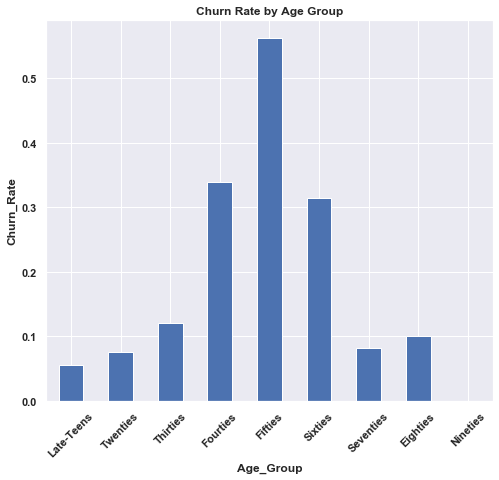

In [45]:
### Churn Rate by Age_Group ###
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
names = ['Late-Teens', 'Twenties', 'Thirties', 'Fourties', 'Fifties', 'Sixties', 'Seventies', 'Eighties', 'Nineties']
bank['Age_Group'] = pd.cut(bank['Age'], bins, labels=names)
churn = bank.groupby('Age_Group').agg({'Churn': [np.mean, 'count']})
print(churn)
print('\nChurn Rate is at its highest between the ages of 40-69. Peak churn rate occurred for customers in their fifties with a churn rate of 56.2% !')
churn = pd.DataFrame(churn)
churn['Churn']['mean'].plot(kind='bar')
plt.title('Churn Rate by Age Group', fontweight='bold')
plt.xlabel('Age_Group')
plt.xticks(rotation=45)
plt.ylabel('Churn_Rate')


In [46]:
### Churn Rate by Income ###

bins = [0, 40000, 80000, 120000, 160000, 200000]
names = ['0-40000', '40000-80000', '80000-120000', '120000-160000', '160000-200000']
bank['Income_Group'] = pd.cut(bank['Income'], bins, labels=names)
churn = bank.groupby('Income_Group').agg({'Churn': [np.mean, 'count']})
print(churn)
print('\nChurn rate was relatively steady among the income groups. Those who earned the most churned at a slightly higher rate.')

                  Churn      
                   mean count
Income_Group                 
0-40000        0.201535  1955
40000-80000    0.198229  2033
80000-120000   0.200591  2029
120000-160000  0.202112  1989
160000-200000  0.216148  1994

Churn rate was relatively steady among the income groups. Those who earned the most churned at a slightly higher rate.


In [47]:
### Churn Rate by Credit_Score ###

bins = [340, 475, 600, 725, 860]
names = ['350-475', '475-600', '600-725', '725-850']
bank['Credit_Score_Group'] = pd.cut(bank['Credit_Score'], bins, labels=names)
churn = bank.groupby('Credit_Score_Group').agg({'Churn': [np.mean, 'count']})
print(churn)
print('\nLower Credit Score generally leads to higher churn rate')

                       Churn      
                        mean count
Credit_Score_Group                
350-475             0.257703   357
475-600             0.211517  2709
600-725             0.195111  4664
725-850             0.203524  2270

Lower Credit Score generally leads to higher churn rate


In [48]:
### Churn Rate by Balance ###

bins = [-1, 1, 65000, 130000, 195000, 260000]
names = ['0', '0<=65000', '65000-130000', '130000-195000', '195000-260000']
bank['Balance_Groups'] = pd.cut(bank['Balance'], bins, labels=names)
churn = bank.groupby('Balance_Groups').agg({'Churn': [np.mean, 'count']})
print(churn)
print('\nThose who kept the highest balance churned at the highest rate. Churn rate was similar for those containing a balance between 65,000 - 195,000 (with churn rate decreasing as the balance grew in this range). The best churn rate experienced was for those who did not hold a balance.')

                   Churn      
                    mean count
Balance_Groups                
0               0.138236  3617
0<=65000        0.257642   229
65000-130000    0.242315  3871
130000-195000   0.231560  2237
195000-260000   0.478261    46

Those who kept the highest balance churned at the highest rate. Churn rate was similar for those containing a balance between 65,000 - 195,000 (with churn rate decreasing as the balance grew in this range). The best churn rate experienced was for those who did not hold a balance.


In [193]:
### Dropping Categorical Groups Created for Data Analysis in prep. for ML ###
bank = bank.drop(['Age_Group', 'Credit_Score_Group', 'Income_Group', 'Balance_Group'], axis=1)

**Part II: Machine Learning**

Churn - Training Set
0    6370
1    1630
Name: Churn, dtype: int64


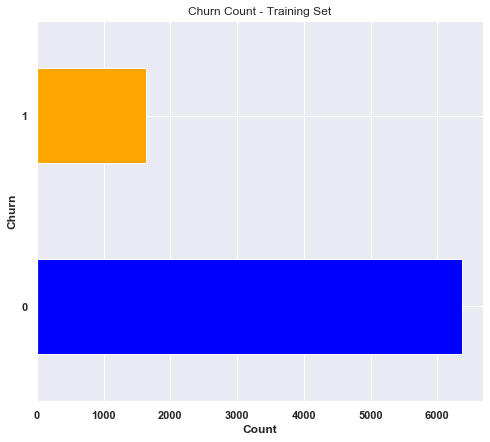

In [198]:
from sklearn.model_selection import train_test_split

bank_ml = pd.get_dummies(data=bank, columns=['Country', 'Gender'], drop_first=False)
X = bank_ml.drop('Churn', axis=1).values
y = bank_ml['Churn'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=0)
new = pd.DataFrame(y_train)
new.columns = ['Churn']
print('Churn - Training Set')
print(new['Churn'].value_counts())
new['Churn'].value_counts().plot(kind='barh', color=my_colors)
plt.title('Churn Count - Training Set', fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Churn')
plt.show()

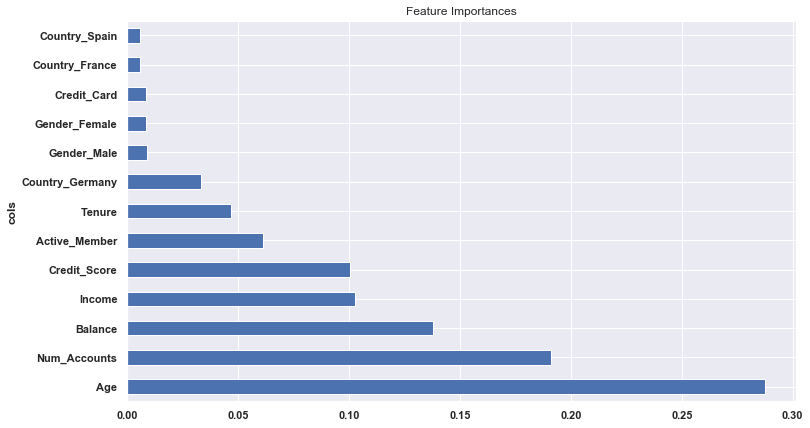


OOB Score:  0.864875

Best Params: {'n_estimators': 200, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 20}
Training F1_Macro: 0.7482409807978828
Training Accuracy: 0.8631275

Testing Accuracy: 0.866
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.78      0.47      0.59       407

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

[[1540   53]
 [ 215  192]]

ROC_AUC:  0.719236956525092


In [205]:
### RandomForestClassifier ###

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)

def plot_fi(fi): 
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

scoring = ['accuracy','f1_macro']

clf = RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=27)
rand_search = RandomizedSearchCV(clf, 
                           param_distributions={
                                       "n_estimators": [200, 400, 600, 800, 1000],
                                       "max_depth": [10, 20, 30, 40, 50],
                                       "min_samples_leaf": [10, 5, 3, 2, 1],
                                       "min_samples_split": [2, 5, 10, 15, 20],
                                       "max_features": ['sqrt', 'log2', .5, None]
                                       },
                           n_jobs=-1, scoring=scoring, refit='f1_macro',
                           cv=5, n_iter = 200)
rand_search.fit(X_train, y_train)
best_clf = rand_search.best_estimator_
y_pred_test = best_clf.predict(X_test)
fi = rf_feat_importance(best_clf, bank_ml.drop('Churn', axis=1))
plot_fi(fi)
plt.title('Feature Importances')
plt.show()

print('\nOOB Score: ', best_clf.oob_score_)
print('\nBest Params:', rand_search.best_params_)
print('Training F1_Macro:', np.mean(rand_search.cv_results_['mean_test_f1_macro']))
print('Training Accuracy:', np.mean(rand_search.cv_results_['mean_test_accuracy']))
print('\nTesting Accuracy:', best_clf.score(X_test, y_test))
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nROC_AUC: ', roc_auc)

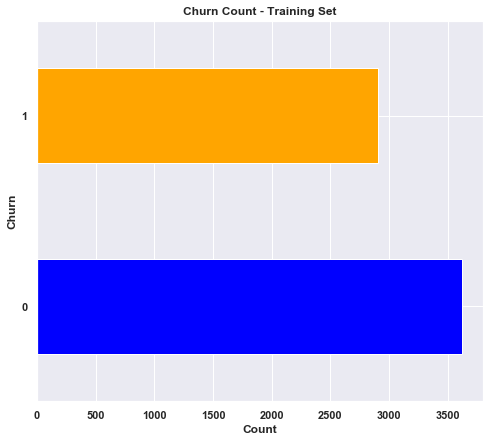

1    3621
0    2908
dtype: int64


In [221]:
### Utilizing SMOTEENN - Hybrid Approach of Undersampling & Oversampling the training set ###

from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y) 
hybrid = pd.Series(y_resampled)
hybrid.value_counts().reset_index(drop=True).plot(kind='barh', color=my_colors)
plt.xlabel('Count')
plt.ylabel('Churn')
plt.title('Churn Count - Training Set', fontweight='bold')
plt.show()
print(hybrid.value_counts())

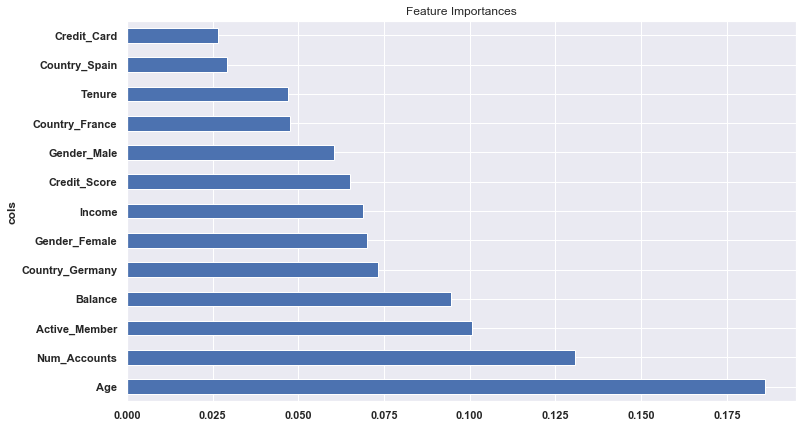


OOB Score:  0.9166794302343391

Best Params: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Training F1_Macro: 0.8848256057395097
Training Accuracy: 0.8883841323326697

Testing Accuracy: 0.899
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1593
           1       0.78      0.71      0.74       407

    accuracy                           0.90      2000
   macro avg       0.85      0.83      0.84      2000
weighted avg       0.90      0.90      0.90      2000

[[1511   82]
 [ 120  287]]

ROC_AUC:  0.8268422505710642


In [219]:
### RandomForestClassifier Utilizing New Training Set Data ###

clf = RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=27)
rand_search = RandomizedSearchCV(clf, 
                           param_distributions={
                                       "n_estimators": [200, 400, 600, 800, 1000],
                                       "max_depth": [10, 20, 30, 40, 50],
                                       "min_samples_leaf": [10, 5, 3, 2, 1],
                                       "min_samples_split": [2, 5, 10, 15, 20],
                                       "max_features": ['sqrt', 'log2', .5, None]
                                       },
                           n_jobs=-1, scoring=scoring, refit='f1_macro',
                           cv=5, n_iter = 50)
rand_search.fit(X_resampled, y_resampled)
best_clf = rand_search.best_estimator_
y_pred_test = best_clf.predict(X_test)
fi = rf_feat_importance(best_clf, bank_ml.drop('Churn', axis=1))
plot_fi(fi)
plt.title('Feature Importances')
plt.show()

print('\nOOB Score: ', best_clf.oob_score_)
print('\nBest Params:', rand_search.best_params_)
print('Training F1_Macro:', np.mean(rand_search.cv_results_['mean_test_f1_macro']))
print('Training Accuracy:', np.mean(rand_search.cv_results_['mean_test_accuracy']))
print('\nTesting Accuracy:', best_clf.score(X_test, y_test))
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nROC_AUC: ', roc_auc)